In [3]:
from glob import glob 
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 
import json 
import os 
import yaml 

from src  import Reconstruction_Metric,create_transformation,Machine_Metric
from tqdm import tqdm 

# Pre process 

## Reconstruction 방식 확인 

In [2]:
dirs = sorted(glob('./Save_models/*'))
dirs = pd.Series(dirs)[pd.Series(dirs).apply(lambda x : 'MVtecAD' not in x)].values
aug_name = pd.Series(dirs).apply(lambda x : x.split('/')[-1]).values

In [3]:

AUROC = [] 
ROC = [] 
METRIC = []
roc = [] 
Machine_METRIC = [] 
auroc = [] 
for dir,name in zip(dirs,aug_name):
    try:
        with open (sorted(glob(os.path.join(dir,'*')))[0],'rb') as f:
            data = json.load(f)
        [fpr,tpr,_] = data['auto']['roc']
        [acc,pre,rec,f1] = data['auto']['metric']

        AUROC.append(data['auto']['auroc'])
        ROC.append([fpr,tpr])
        METRIC.append([acc,pre,rec,f1])

        Machine_METRIC.append(data['machine']['metric'])
        roc.append(data['machine']['roc'])
        auroc.append(data['machine']['auroc'])

    except:
        pass
ROC = np.array(ROC)    
AUROC = np.array(AUROC)
METRIC = np.array(METRIC)
Machine_METRIC = np.array(Machine_METRIC)
auroc = np.array(auroc)
roc = np.array(roc)

/tmp/ipykernel_23521/3961555365.py:24: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ROC = np.array(ROC)
/tmp/ipykernel_23521/3961555365.py:29: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  roc = np.array(roc)


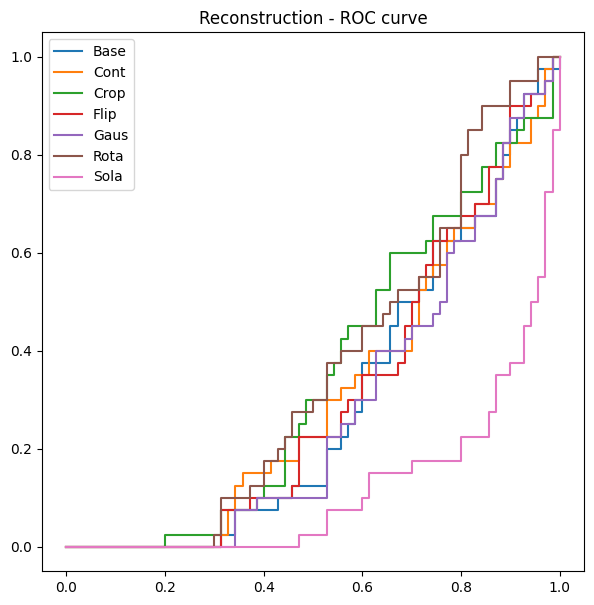

In [5]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(7,7))
plt.title('Reconstruction - ROC curve')
for (fpr,tpr),name in zip(ROC,aug_name):
    plt.plot(fpr,tpr,label=name)
plt.legend()
plt.show()    

In [6]:
auto_metric = pd.DataFrame(np.c_[METRIC,AUROC])
auto_metric.columns = ['Accuracy','Precision','Recall','F1-score','AUROC']
auto_metric = auto_metric.rename(index={key:value for key,value in enumerate(aug_name)})
auto_metric

,Accuracy,Precision,Recall,F1-score,AUROC
Base,0.636364,0.788462,0.585714,0.672131,0.2979
Cont,0.581818,0.815789,0.442857,0.574074,0.3125
Crop,0.509091,0.944444,0.242857,0.386364,0.3504
Flip,0.618182,0.804348,0.528571,0.637931,0.3089
Gaus,0.627273,0.822222,0.528571,0.643478,0.2854
Rota,0.600000,0.696970,0.657143,0.676471,0.3604
Sola,0.527273,1.000000,0.257143,0.409091,0.1200


## Machine Learning 방식 확인 

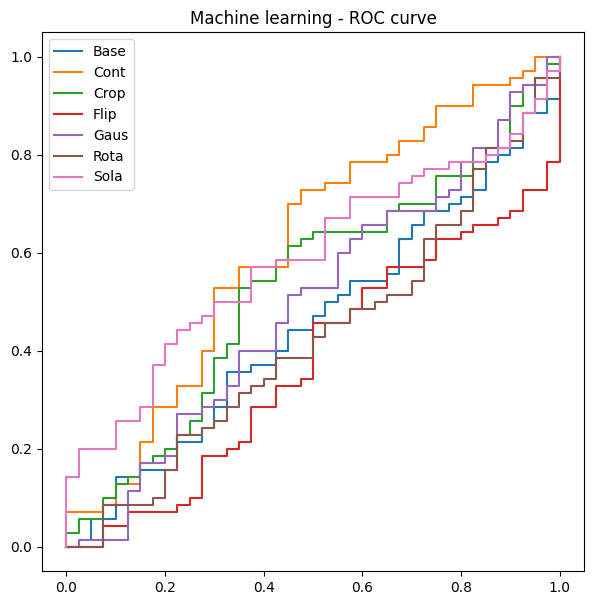

In [7]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(7,7))
plt.title('Machine learning - ROC curve')
for (fpr,tpr,_),name in zip(roc,aug_name):
    plt.plot(fpr,tpr,label=name)
plt.legend()
plt.show()    

In [8]:
machine_metric = pd.DataFrame(np.c_[Machine_METRIC,auroc])
machine_metric.columns = ['Accuracy','Precision','Recall','F1-score','Auroc']
machine_metric = machine_metric.rename(index={key:value for key,value in enumerate(aug_name)})
machine_metric

,Accuracy,Precision,Recall,F1-score,Auroc
Base,0.490909,0.616667,0.528571,0.569231,0.4536
Cont,0.463636,0.720000,0.257143,0.378947,0.6129
Crop,0.536364,0.633803,0.642857,0.638298,0.5304
Flip,0.463636,0.587302,0.528571,0.556391,0.3736
Gaus,0.563636,0.648649,0.685714,0.666667,0.4936
Rota,0.436364,0.562500,0.514286,0.537313,0.4257
Sola,0.490909,0.750000,0.300000,0.428571,0.5879


# Post process 

## Reconstruction metric 

In [9]:
import yaml 
cfg = yaml.load(open('./Save_models/Base/config.yaml','r'), Loader=yaml.FullLoader)

In [10]:
from src  import Reconstruction_Metric,create_transformation
from tqdm import tqdm 
AUROC = [] 
ROC = [] 
METRIC = [] 
for i in tqdm(range(7)):
    cfg['aug_number'] = i 
    trans = create_transformation(cfg)
    Recon = Reconstruction_Metric(cfg,trans)
    [auroc,roc],metric = Recon.main()
    AUROC.append(auroc)
    ROC.append(roc)
    METRIC.append(metric)

ROC = np.array(ROC)    
AUROC = np.array(AUROC)
METRIC = np.array(METRIC)    

/usr/local/lib/python3.8/dist-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████| 7/7 [02:15<00:00, 19.30s/it]


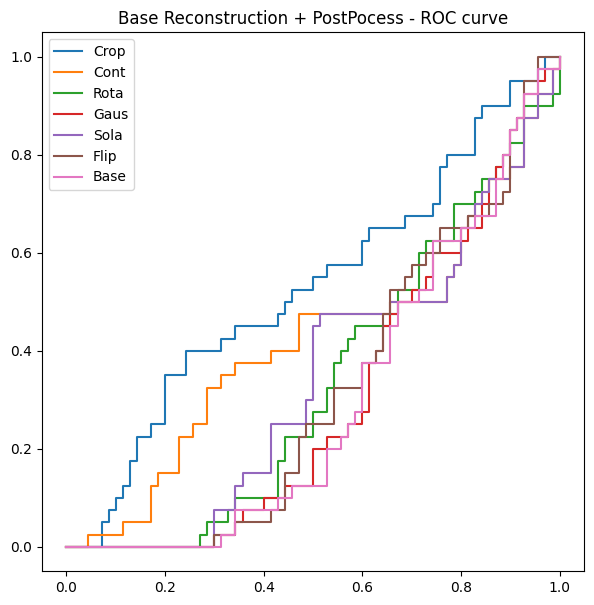

In [11]:
aug_name = ['Crop','Cont','Rota','Gaus','Sola','Flip','Base']
plt.figure(figsize=(7,7))
plt.title('Base Reconstruction + PostPocess - ROC curve')
for (fpr,tpr),name in zip(ROC[:,:2],aug_name):
    plt.plot(fpr,tpr,label=name)
plt.legend()
plt.show()    

In [12]:
auto_metric = pd.DataFrame(np.c_[METRIC,AUROC])
auto_metric.columns = ['Accuracy','Precision','Recall','F1-score','AUROC']
auto_metric = auto_metric.rename(index={key:value for key,value in enumerate(aug_name)})
auto_metric

,Accuracy,Precision,Recall,F1-score,AUROC
Crop,0.618182,0.629630,0.971429,0.764045,0.5300
Cont,0.654545,0.700000,0.800000,0.746667,0.4157
Rota,0.654545,0.650943,0.985714,0.784091,0.3354
Gaus,0.627273,0.808511,0.542857,0.649573,0.3018
Sola,0.654545,0.700000,0.800000,0.746667,0.3421
Flip,0.609091,0.670886,0.757143,0.711409,0.3179
Base,0.636364,0.788462,0.585714,0.672131,0.2979


## Machine Learning 

In [13]:

AUROC = [] 
ROC = [] 
METRIC = [] 
for i in tqdm(range(7)):
    cfg['aug_number'] = i 
    trans = create_transformation(cfg)
    Machine = Machine_Metric(cfg,trans)
    [auroc,roc],metric = Machine.main()
    AUROC.append(auroc)
    ROC.append(roc)
    METRIC.append(metric)

ROC = np.array(ROC)    
AUROC = np.array(AUROC)
METRIC = np.array(METRIC)      

100%|██████████| 7/7 [02:10<00:00, 18.62s/it]


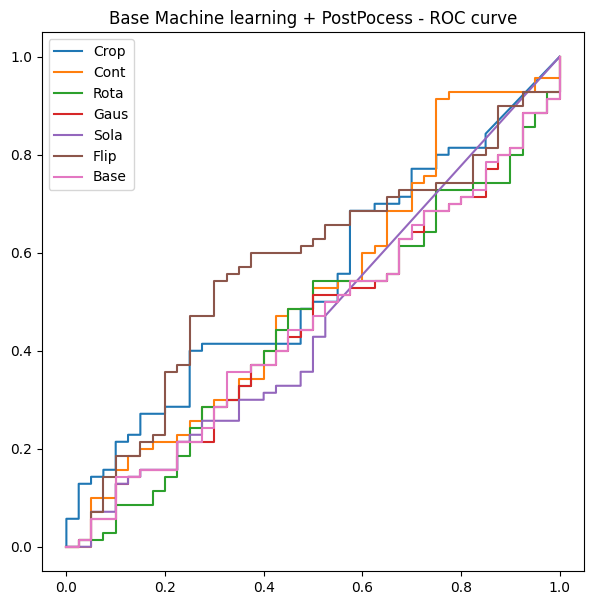

In [14]:
aug_name = ['Crop','Cont','Rota','Gaus','Sola','Flip','Base']
plt.figure(figsize=(7,7))
plt.title('Base Machine learning + PostPocess - ROC curve')
for (fpr,tpr),name in zip(ROC[:,:2],aug_name):
    plt.plot(fpr,tpr,label=name)
plt.legend()
plt.show()    

In [15]:
Machine_metric = pd.DataFrame(np.c_[METRIC,AUROC])
Machine_metric.columns = ['Accuracy','Precision','Recall','F1-score','AUROC']
Machine_metric = Machine_metric.rename(index={key:value for key,value in enumerate(aug_name)})
Machine_metric

,Accuracy,Precision,Recall,F1-score,AUROC
Crop,0.363636,0.000000,0.000000,0.000000,0.5400
Cont,0.445455,0.621622,0.328571,0.429907,0.5157
Rota,0.509091,0.633333,0.542857,0.584615,0.4489
Gaus,0.490909,0.616667,0.528571,0.569231,0.4496
Sola,0.418182,0.607143,0.242857,0.346939,0.4609
Flip,0.445455,0.764706,0.185714,0.298851,0.5682
Base,0.490909,0.616667,0.528571,0.569231,0.4536


# Preprcoess + PostProcess 

## Reconstruction method 
- Preprocess : Rota 
- Postprocess : Crop 

### Pre-Post Mixed 

In [6]:
#Preprocess : Rota  선택 
mixed_cfg = yaml.load(open('./Save_models/Rota/config.yaml','r'), Loader=yaml.FullLoader)
#Postprocess : Crop 선택 
mixed_cfg['aug_number'] = 0 

trans = create_transformation(mixed_cfg) 
mixed_Recon = Reconstruction_Metric(mixed_cfg,trans)
[mixed_AUROC,mixed_ROC],mixed_METRIC = mixed_Recon.main()

### 비교군 : Baseline 

In [50]:
dirs = sorted(glob('./Save_models/*'))
dirs = pd.Series(dirs)[pd.Series(dirs).apply(lambda x : 'MVtecAD' not in x)].values

# 비교군 : only Preprocess 
with open (sorted(glob(os.path.join(dirs[0],'*')))[0],'rb') as f:
    data = json.load(f)
Base_AUROC = data['auto']['auroc']
Base_ROC = data['auto']['roc']
Base_METRIC = data['auto']['metric']

### 비교군 : Only Pre : Rotate 

In [13]:
# 비교군 : only Preprocess 
with open (sorted(glob(os.path.join(dirs[5],'*')))[0],'rb') as f:
    data = json.load(f)
pre_AUROC = data['auto']['auroc']
pre_ROC = data['auto']['roc']
pre_METRIC = data['auto']['metric']

### 비교군 : Only Post : Crop 

In [14]:
# 비교군 : only postprocess 
cfg = yaml.load(open('./Save_models/Base/config.yaml','r'), Loader=yaml.FullLoader)
cfg['aug_number'] = 0 
Recon = Reconstruction_Metric(cfg,trans)
[post_AUROC,post_ROC],post_METRIC = Recon.main()

### 비교 

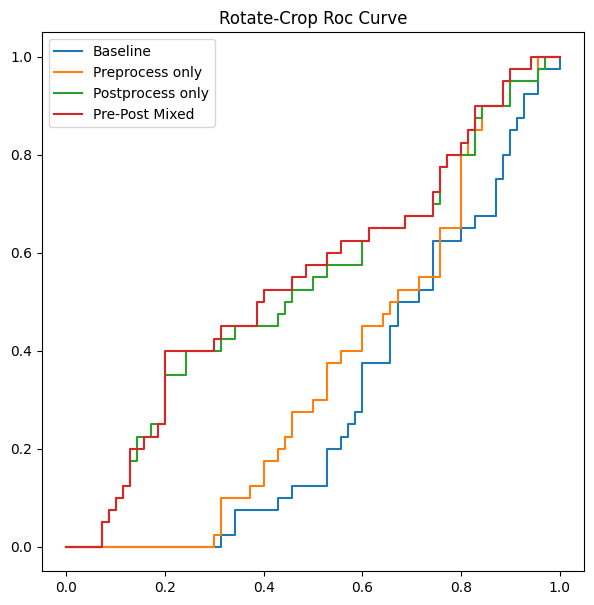

In [58]:
plt.figure(figsize=(7,7))

#Mixed 
plt.title('Rotate-Crop Roc Curve')
plt.plot(Base_ROC[0],Base_ROC[1],label='Baseline')
plt.plot(pre_ROC[0],pre_ROC[1],label = 'Preprocess only')
plt.plot(post_ROC[0],post_ROC[1],label = 'Postprocess only')
plt.plot(mixed_ROC[0],mixed_ROC[1],label='Pre-Post Mixed')

plt.legend()
plt.show()

In [57]:
df = pd.DataFrame(np.c_[np.c_[Base_METRIC,pre_METRIC,post_METRIC,mixed_METRIC].T,np.r_[Base_AUROC,pre_AUROC,post_AUROC,mixed_AUROC].T])
df.columns = ['Accuracy','Precision','Recall','F1-score','AUROC']
df = df.rename(index = {0:'Baseline',1:'Pre Only',2:'Post Only',3:'Mixed'})
df

,Accuracy,Precision,Recall,F1-score,AUROC
Baseline,0.636364,0.788462,0.585714,0.672131,0.2979
Pre Only,0.600000,0.696970,0.657143,0.676471,0.3604
Post Only,0.618182,0.629630,0.971429,0.764045,0.5300
Mixed,0.609091,0.626168,0.957143,0.757062,0.5464


## Machine learning method 
- Preprocess : Contrast
- Postprocess : Crop 

### Pre-Post Mixed 

In [71]:
#Preprocess : Contrast  선택 
mixed_cfg = yaml.load(open('./Save_models/Cont/config.yaml','r'), Loader=yaml.FullLoader)
#Postprocess : Crop 선택 
mixed_cfg['aug_number'] = 5

trans = create_transformation(mixed_cfg) 
mixed_Machine = Machine_Metric(mixed_cfg,trans)
[mixed_AUROC,mixed_ROC],mixed_METRIC = mixed_Machine.main()

### 비교군 : Baseline 

In [64]:
dirs = sorted(glob('./Save_models/*'))
dirs = pd.Series(dirs)[pd.Series(dirs).apply(lambda x : 'MVtecAD' not in x)].values

# 비교군 : only Preprocess 
with open (sorted(glob(os.path.join(dirs[0],'*')))[0],'rb') as f:
    data = json.load(f)
Base_AUROC = data['machine']['auroc']
Base_ROC = data['machine']['roc']
Base_METRIC = data['machine']['metric']

### 비교군 : only Pre : Contrast 

In [76]:
# 비교군 : only Preprocess 
with open (sorted(glob(os.path.join(dirs[1],'*')))[0],'rb') as f:
    data = json.load(f)
pre_AUROC = data['machine']['auroc']
pre_ROC = data['machine']['roc']
pre_METRIC = data['machine']['metric']

### 비교군 : only Post : Flip

In [72]:
# 비교군 : only postprocess 
cfg = yaml.load(open('./Save_models/Base/config.yaml','r'), Loader=yaml.FullLoader)
cfg['aug_number'] = 5
Machine = Machine_Metric(cfg,trans)
[post_AUROC,post_ROC],post_METRIC = Machine.main()

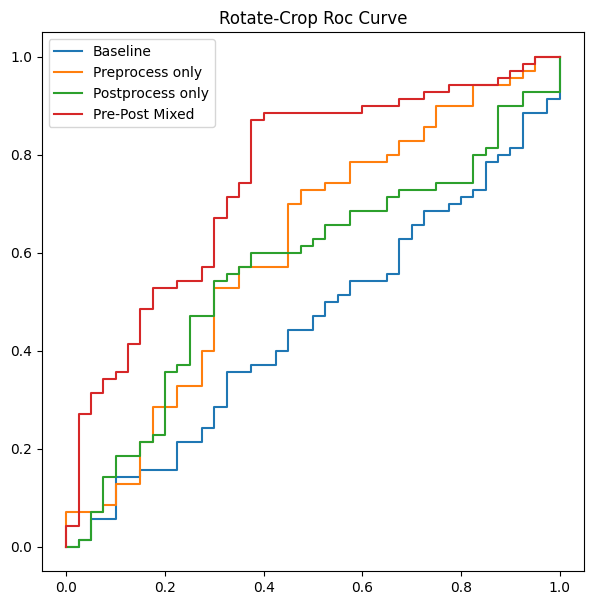

In [77]:
plt.figure(figsize=(7,7))

#Mixed 
plt.title('Rotate-Crop Roc Curve')
plt.plot(Base_ROC[0],Base_ROC[1],label='Baseline')
plt.plot(pre_ROC[0],pre_ROC[1],label = 'Preprocess only')
plt.plot(post_ROC[0],post_ROC[1],label = 'Postprocess only')
plt.plot(mixed_ROC[0],mixed_ROC[1],label='Pre-Post Mixed')

plt.legend()
plt.show()

In [78]:
df = pd.DataFrame(np.c_[np.c_[Base_METRIC,pre_METRIC,post_METRIC,mixed_METRIC].T,np.r_[Base_AUROC,pre_AUROC,post_AUROC,mixed_AUROC].T])
df.columns = ['Accuracy','Precision','Recall','F1-score','AUROC']
df = df.rename(index = {0:'Baseline',1:'Pre Only',2:'Post Only',3:'Mixed'})
df

,Accuracy,Precision,Recall,F1-score,AUROC
Baseline,0.490909,0.616667,0.528571,0.569231,0.4536
Pre Only,0.463636,0.720000,0.257143,0.378947,0.6129
Post Only,0.445455,0.764706,0.185714,0.298851,0.5682
Mixed,0.427273,0.888889,0.114286,0.202532,0.7525
